# Exploratory Data Analysis
**Autori:** Erik Matovič a Simon Kokavec   
**Číslo datasetu:** 165  
**Percentuálny podiel:** 50/50

## 0. Importovanie

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab as py
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
from math import sqrt

## 1. Základný opis dát spolu s ich charakteristikami

### Zadanie  
Pre dosiahnutie plného počtu bodov uveďte  
 - počet záznamov,
 - počet atribútov,
 - ich typy,
 - pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.
 
 ### Riešenie
 
 

In [2]:
# read labor and profiles dataset
df_labor = pd.read_csv('./data/labor.csv', sep='\t')
df_profiles = pd.read_csv('./data/profiles.csv', sep='\t')

**Leukémia** - Rakovina krvi pri ktorej dochádza k nekontrolovanému množeniu (najmä poškodených) bielych krviniek. Tieto krvinky sú produkované v kostnej dreni, kde obmedzujú správnu produkciu iných buniek. 

V kostnej dreni sú okrem bielych krviniek produkované aj červené krvinky a trombocyty. 

### Prečo luekémia zabíja ? 
   - Červené krvniky správne nefungujú nakoľko ich produkciu vytláčajú premnožené biele krvinky takže zlyhajú nedobre okysličené orgány.
   - Druhá život ohrozujúca varianta je infekcia/baktéria v tele pacienta. Pri leukémii kvôli oslabenému imunitnému (množstvo poškodených bielych krviniek) systému môžu byť takéto infekcie/baktérie fatálne.
   - Veľkým problémom je taktiež ukladanie poškodených bielych krviniek do orgánov čo môže spôsobovať rôzne problémy.  
   - Nízka hladina trombocitov spôsobuje zlé zrážanie krvi čo spôsobbuje že pacient je náchylný na krvácavé stavy   

Leukémia často spôsobuje anémiu ktorá sa vyznačuje nízkou hladinou práve červených krviniek, ktoré sú taktiež produkované v kostnej dreni. Veľký pokles týchto krviniek je života ohrozujúci. 

Pacienti s diagnostikovanou leukémiou zvyčajne mávajú pri laboratórnych výsledkoch zvýšené pečeňové enzými AST, ALT, ALP. Tieto enzými sú jednými z hlavných markerov pri diagnostikovaní leukémie z krvi. Tieto poškodenia sú asociované s nízkou hladinou hemoglobínu a nízkou hladinou trombocytov. Tieto pečeňové enzýmy taktiež vykazujú zvýšené hodnoty počas pretrvávajúcej chemoterapie.

**Chronická limfoídna leukémia** je bežnejšia u starších pacientov (nad 60) na rozdiel od akútnej, ktorá je prevažne diagnostikovaná u ľudí pod 20 rokov. 


### Štatistika profilov pacientov

- ##### **Unnamed** (ID) - Číslo riadku

- ##### **name** (Meno) - Meno pacienta

- ##### **sex** (Pohlavie) - Pohlavie pacienta

- ##### **current_location** (Poloha) - 

- ##### **blood_group** (Krvná skupina) - Krvná skupina pacienta

- ##### **residence** (Bydlisko) - 

- ##### **birthdate** (Dátum narodenia) - Dátum narodenia pacienta

- ##### **race** (Rasa) - Rasová príslušnosť pacienta

- ##### **ssn** (Social Secuirty Number - Sociálne Bezpečnostné číslo) - Deväť miestne číslo obyvateľov USA.

- ##### **address** (Adresa) - Adresa trvalého bydliska pacienta


### Štatistika laboratórnych výsledkov

- ##### **Unnamed** (ID) - Číslo riadku

- ##### **hemoglobin** (Hemoglobín) - Červené krvné farbivo. Tvorí veľkú časť erytrocytov. Zabezpečuje prenos kyslíka z pľúc do tkanív.

- ##### **leukocyty** (Leukocyty) - Biela krvinka. V krvi je ich menej ako erytrocytov. Leukocyty sú zodpovedné za imunitnú odpoveď. Zabezpečujú ochranu proti chorobám a nemociam.

- ##### **etytr** () -

- ##### **weight** (Hmotnosť) - Hmotnosť pacienta

- ##### **trombocyty** (Trombocyty) - Krvné doštičky. Veľké množstvo v krvi. Ich úlohou je udržiavať správnu zrážanlivosť krvi a tým zabezpečiť zastavenie krvácania.

- ##### **ast** (Aspartate transaminase - Aspartát transamináza) - Pečeňový enzým. Ukazateľ poškodenia najmä pečene ale aj srdca, kostrových svalov (napr. biceps), obličiek a mozgu.

- ##### **alp** (Alkaline phosphatase - Alkalická fosfatáza) - Pečeňový enzým. Ukazateľ poškodenia najmä pečene ale aj žlčových ciest, obličiek, kostí a tak ďalej.

- ##### **relationship** (Vzťah) - Rodinné založenie pacienta (Ženatý, rozvedený...)

- ##### **name** (Meno) - Meno pacienta

- ##### **alt** (Alanine transaminase - Alanín transamináza) - Pečeňový enzým. Najdôležitejší marker ukazovania poškodenia pečene.

- ##### **hbver** () -

- ##### **smoker** (Fajčiar) - Indikuje či pacient je fajčiar

- ##### **erytrocyty** (Erytrocyty) - Červené krvinky. Pomocou hemoglobin prepravujú kyslík z pľúc do tkanív. Následný oremenený oxid uhličitý nesú naspäť do pľúc.

- ##### **er-cv** () -

- ##### **indicator** (Indikátor) - Indikuje stav pacienta.

- ##### **ssn** (Social Secuirty Number - Sociálne Bezpečnostné číslo) - Deväť miestne číslo obyvateľov USA.

- ##### **hematokrit** (Hematokrit) - Pomer erytrocytov v krvi. 

In [3]:
df_labor.shape, df_profiles.shape

((10035, 18), (3064, 10))

 - labor.csv má 10035 riadkov/zaznamy a 18 stĺpcov/atributov  
 - profiles.csv má 3064 riadkov/zaznamy a 10 stĺpcov/atributov 

In [4]:
df_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10035 entries, 0 to 10034
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10035 non-null  int64  
 1   hemoglobin    10005 non-null  float64
 2   leukocyty     10004 non-null  float64
 3   etytr         10005 non-null  float64
 4   weight        10035 non-null  float64
 5   trombocyty    10005 non-null  float64
 6   ast           10005 non-null  float64
 7   alp           10004 non-null  float64
 8   relationship  10035 non-null  object 
 9   name          10035 non-null  object 
 10  alt           10005 non-null  float64
 11  hbver         10005 non-null  float64
 12  smoker        10035 non-null  object 
 13  erytrocyty    10005 non-null  float64
 14  er-cv         10005 non-null  float64
 15  indicator     10035 non-null  float64
 16  ssn           10035 non-null  object 
 17  hematokrit    10005 non-null  float64
dtypes: float64(13), int64(1), 

 - labor.csv má 18 stĺpcov, prevažne sú numerického typu(int a float), niektoré sú typu object(str)  
 - zároveň je vidieť nesúmer medzi poćtom atribútov - 10035 je celkový poćet, avšak niektoré záznamy majú o 30 menej, t.j. 10005(stĺpce hematokrit, er-cv, erytrocyty, hbver, alt, ast, trombocyty, eryrt, hemoglobin) a niektoré(leukocyty a alp) majú 10004 -> nutnosť riešiť pri transformácií údajov
 - dáta nemajú null hodnoty, ale vzhľadom na rozdielny poćet medzi stĺpcami majú NaN hodnoty(viď tail() nižšie)

In [5]:
df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3064 non-null   int64 
 1   name              3064 non-null   object
 2   sex               3064 non-null   object
 3   current_location  3064 non-null   object
 4   blood_group       3064 non-null   object
 5   residence         3064 non-null   object
 6   birthdate         3064 non-null   object
 7   race              3064 non-null   object
 8   ssn               3064 non-null   object
 9   address           3064 non-null   object
dtypes: int64(1), object(9)
memory usage: 239.5+ KB


 - profiles.csv má 10 stĺpcov, prevažne sú objektového typu(str), unnamed: 0 je celočíselného typu(integer) 
 - zároveň je vidieť, že všetky záznamy majú rovnaký poćet atribútov - 3064

In [6]:
df_labor.head()

,Unnamed: 0,hemoglobin,leukocyty,etytr,weight,trombocyty,ast,alp,relationship,name,alt,hbver,smoker,erytrocyty,er-cv,indicator,ssn,hematokrit
0,0,6.77299,5.28153,4.79087,104.22450,7.22472,61.85014,80.77401,married,Kathryn Wagner,2.01576,9.04461,no,7.94417,61.31451,0.0,887-91-9698,5.40103
1,1,6.35217,5.45245,3.34754,65.03608,7.00407,66.90722,90.01585,widowed,Frank Becker,0.81519,9.09262,no,5.33302,58.00624,0.0,506-37-0250,7.68167
2,2,5.37162,7.36106,7.10989,63.61518,6.95232,65.33091,74.23784,married,Stephanie Lewis,0.79787,6.18215,no,6.38771,62.73102,1.0,331-52-1241,6.27422
3,3,4.60987,8.04010,4.97779,30.35294,6.63243,67.33708,34.67995,married,Luis Williams,0.83917,5.22920,no,5.05640,62.60592,1.0,407-22-7513,6.61263
4,4,5.97408,6.66899,5.58872,97.97181,6.18242,67.48751,89.31030,divoced,Donald Hall,1.20122,4.97805,yes,5.10205,59.32470,1.0,486-30-7935,6.23117


In [7]:
df_profiles.head()

,Unnamed: 0,name,sex,current_location,blood_group,residence,birthdate,race,ssn,address
0,0,Elizabeth Johnson,F,"(Decimal('-64.545933'), Decimal('5.817377'))",B-,"319 Bradley Tunnel Suite 246\nBoyerstad, GA 12067","10/30/1938, 00:00:00",White,518-82-6493,"09441 Joyce Route Suite 717\nWest Megan, GA 12969"
1,1,Scott Holmes,M,"(Decimal('-18.8183775'), Decimal('94.375497'))",A-,"28739 Hoffman Valleys Apt. 636\nMichaelville, ...",1927-06-20,Black,015-03-8632,USNS Miller\nFPO AE 08377
2,2,William Roth,M,"(Decimal('35.903361'), Decimal('-133.029344'))",B-,"8623 Jordan Canyon Suite 498\nJoshuastad, OH 3...",1965-10-02,Black,898-78-8500,"7747 Nicole Wells\nShannonside, MI 84296"
3,3,Kimberly Barnes,F,"(Decimal('55.2055095'), Decimal('-121.665483'))",B+,Unit 0522 Box 6156\nDPO AE 24368,1962-02-14,White,478-72-0155,"228 Colleen Extension\nLake Morgan, AL 34806"
4,4,Sarah Escobar,F,"(Decimal('49.512264'), Decimal('-121.259776'))",AB-,"30306 Molina Junction\nPort Edwardview, OK 72746",02 Oct 1936,Indian,683-31-6335,"08249 Gentry Fall\nLewisshire, NY 20037"


 - pozrieme sa na dáta cez head

In [8]:
df_labor.tail()

,Unnamed: 0,hemoglobin,leukocyty,etytr,weight,trombocyty,ast,alp,relationship,name,alt,hbver,smoker,erytrocyty,er-cv,indicator,ssn,hematokrit
10030,10030,5.52171,7.37800,7.04815,83.93728,7.29506,74.91299,74.00027,single,Gary Parks,6.29230,9.31528,N,9.21009,40.17639,1.0,028-45-3066,6.95568
10031,10031,5.72390,8.34137,5.88201,78.01508,6.43991,62.61013,82.18824,divoced,Michael Haynes,0.57249,5.58052,Y,5.01783,22.59664,1.0,041-77-3799,6.69757
10032,10032,7.12205,5.31366,4.84312,78.80204,7.76331,78.71905,75.14270,married,Donald Porter,2.38935,8.82716,Y,7.88062,65.02538,0.0,227-65-3699,5.46733
10033,10033,5.39175,5.72726,4.45572,15.18502,5.97680,63.31698,70.90388,single,Cassandra Williams,1.50721,NaN,no,6.81522,64.56211,0.0,669-16-6262,6.82568
10034,10034,7.11616,6.86954,6.25132,53.84799,5.55897,63.52155,76.31498,married,Jessica Diaz,1.62680,7.17967,N,7.49288,70.23548,1.0,524-42-2099,7.11213


In [9]:
df_profiles.tail()

,Unnamed: 0,name,sex,current_location,blood_group,residence,birthdate,race,ssn,address
3059,3059,Mark Washington,M,"(Decimal('-29.355461'), Decimal('39.128253'))",AB+,Unit 8496 Box 2991\nDPO AP 60676,"02/06/1948, 00:00:00",Black,769-02-2637,"96780 Justin Knoll Suite 589\nJonesview, FL 29858"
3060,3060,Kevin Torres,M,"(Decimal('44.1155125'), Decimal('-61.909003'))",O+,Unit 6807 Box 8669\nDPO AP 84633,2004-08-16,white,377-66-0191,"03913 Wendy Prairie Suite 372\nWatsonberg, ND ..."
3061,3061,Sarah Hill,F,"(Decimal('50.745986'), Decimal('63.552771'))",B+,"419 Barrett Radial Apt. 974\nParkermouth, PA 6...","01/04/1993, 00:00:00",White,749-86-9765,"882 Shawn Springs Suite 743\nNorth Amanda, DC ..."
3062,3062,Pamela Tran,F,"(Decimal('34.925995'), Decimal('-144.163677'))",B-,"5877 Jessica Viaduct Apt. 409\nLake Kevin, WY ...",1923-01-19,black,300-60-6784,"56665 Jorge Manors Apt. 278\nMarcoview, AL 06505"
3063,3063,John Robertson,M,"(Decimal('-5.7541135'), Decimal('-147.114234'))",AB+,1990 Paul Tunnel Apt. 686\nNorth Andreachester...,1966/04/22,Black,408-26-3386,"2569 Christensen Rapids\nGarrettchester, NM 24512"


 - pozrieme sa odzadu na dáta

 - môžeme vidieť, že v oboch prípadoch stĺpec **Unnamed:0** slúži ako index/riadkovanie, tak to upravíme
 - profiles má rozdielny zápis pri birthday
 - ssn = social security number

In [10]:
df_profiles.describe()

,Unnamed: 0
count,3064.000000
mean,1531.500000
std,884.644938
min,0.000000
25%,765.750000
50%,1531.500000
75%,2297.250000
max,3063.000000


 - descibe na profiles je zbytočný, kedžde **Unnamed: 0** má byť indexovanie

In [11]:
df_labor.describe()

,Unnamed: 0,hemoglobin,leukocyty,etytr,weight,trombocyty,ast,alp,alt,hbver,erytrocyty,er-cv,indicator,hematokrit
count,10035.00000,10005.000000,10004.000000,10005.000000,10035.000000,10005.000000,10005.000000,10004.000000,10005.000000,10005.000000,10005.000000,10005.000000,10035.000000,10005.000000
mean,5017.00000,6.416198,6.777737,5.990406,69.859131,6.437079,68.231703,71.309492,2.197095,6.864928,6.427883,50.593076,0.641455,6.417913
std,2896.99931,1.006319,1.645043,1.633699,34.627389,0.988548,8.291273,19.056185,3.726174,1.700452,1.701901,13.840494,0.479597,1.004907
min,0.00000,2.944150,0.217130,0.000000,-68.325310,2.999650,0.000000,0.000000,0.000000,1.495520,1.032780,0.000000,0.000000,2.713920
25%,2508.50000,5.735950,5.474353,4.823230,46.136205,5.764240,62.610470,62.698557,0.926420,5.422540,5.151340,41.482190,0.000000,5.735940
50%,5017.00000,6.428260,6.828010,5.823300,69.491810,6.443160,68.257620,77.772515,1.229920,6.752090,6.296280,50.508420,1.000000,6.425880
75%,7525.50000,7.095870,8.013475,7.103040,93.608480,7.097900,73.892760,84.970195,1.966430,8.115930,7.672460,59.893420,1.000000,7.085230
max,10034.00000,10.049840,12.580870,11.632230,191.261970,10.383570,100.000000,100.000000,100.000000,13.080820,12.155200,100.000000,1.000000,10.628720


In [12]:
df_labor.mode()

,Unnamed: 0,hemoglobin,leukocyty,etytr,weight,trombocyty,ast,alp,relationship,name,alt,hbver,smoker,erytrocyty,er-cv,indicator,ssn,hematokrit
0,0,5.49908,5.15386,5.09355,-25.99875,5.55556,47.47899,3.93519,married,Lisa Johnson,0.80941,4.18238,no,4.39560,8.03320,1.0,025-80-8154,5.37203
1,1,5.94626,8.38053,NaN,1.90895,5.94844,47.48398,13.05501,NaN,William Smith,0.94810,4.30120,NaN,4.65822,16.59002,NaN,036-69-5479,5.77042
2,2,6.10271,NaN,NaN,5.31174,6.41337,51.16316,14.85714,NaN,NaN,0.95419,4.37407,NaN,7.46027,20.20161,NaN,055-40-9628,6.08485
3,3,6.36522,NaN,NaN,10.20883,6.57086,54.26873,16.21971,NaN,NaN,0.96373,4.37773,NaN,7.79935,25.30805,NaN,085-41-8095,6.92077
4,4,NaN,NaN,NaN,15.78444,6.66867,54.53670,16.94870,NaN,NaN,1.01803,4.44520,NaN,NaN,25.51180,NaN,090-58-2482,7.45304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,10030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10031,10031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10032,10032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10033,10033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_labor.hemoglobin.mode()

0    5.49908
1    5.94626
2    6.10271
3    6.36522
dtype: float64

In [14]:
stats.mode(a=df_labor.hemoglobin)

ModeResult(mode=array([5.49908]), count=array([3]))

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>,
        <AxesSubplot:title={'center':'leukocyty'}>,
        <AxesSubplot:title={'center':'etytr'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'trombocyty'}>,
        <AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'alp'}>],
       [<AxesSubplot:title={'center':'alt'}>,
        <AxesSubplot:title={'center':'hbver'}>,
        <AxesSubplot:title={'center':'erytrocyty'}>,
        <AxesSubplot:title={'center':'er-cv'}>],
       [<AxesSubplot:title={'center':'indicator'}>,
        <AxesSubplot:title={'center':'hematokrit'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

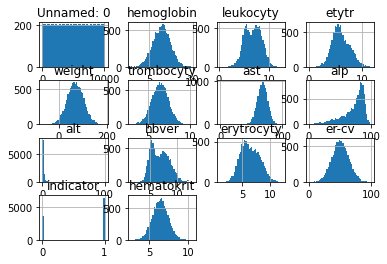

In [15]:
df_labor.hist(bins=50)

 - z uvedených histogramov sa nepotrebujeme bližśie pozrieť na **Unnamed: 0**, pretože to je riadkovanie, a aj na **Indicator**, ktorý ma hodnoty 0 až 1
 

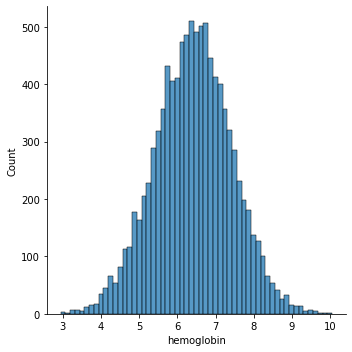

In [16]:
sns.displot(df_labor.hemoglobin)

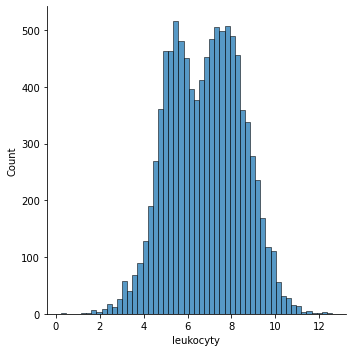

In [17]:
sns.displot(df_labor.leukocyty)

 - leukocyt je hlavným ukazovateľom pri leukémií -> dochádza počas leukémie k veľkému mnoźstvu bielych krviniek - leukecyty  
 - zaujímavá distribúcia - nie je Gaussova, bude asi potreba normalizovat? 

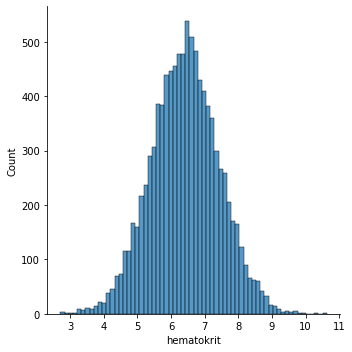

In [18]:
sns.displot(df_labor.hematokrit)

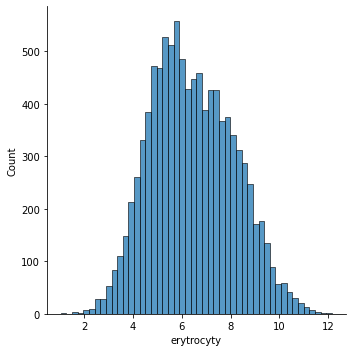

In [19]:
sns.displot(df_labor.erytrocyty)

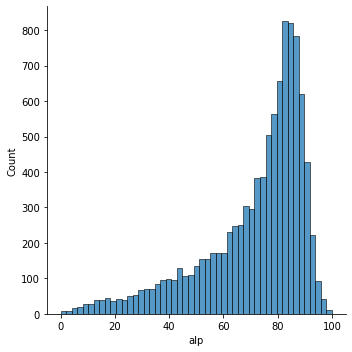

In [20]:
sns.displot(df_labor.alp)

 - alp vyzerá byť v percentách, zaujímavé je, že okolo 80% je najčastejší počet

## 2. Párová analýza dát 

### Zadanie

 - Preskúmajte vzťahy medzi zvolenými dvojicami atribútov.
 - Identifikujte závislostí medzi dvojicami atribútov a závislosti medzi predikovanou premennou a ostatnými premennými.  
 
 ### Riešenie  

Fajné dvojice / Štvorica na anlýzu
- leukocyt + ast - obe vysoké
- leukocyt + alt - obe vysoké
- leukocyt + alp - Vysoké obe (Taktiež vysoké pri anemických pacientoch ale pri leukemických je to o dosť väčšie)


A hematocrit test measures how much of your blood is made up of red blood cells. Ak je ich veľa alebo málo je to indikát že niečo neni okej.
Fajná trojica na analýzu
- leukocyt (veľa) - erythrocyt (malo)
- leukocyt (veľa) - hemoglobin (malo)
- leukocyt (veľa) - hematokrit (malo)


- hematokrit - erytrocytes

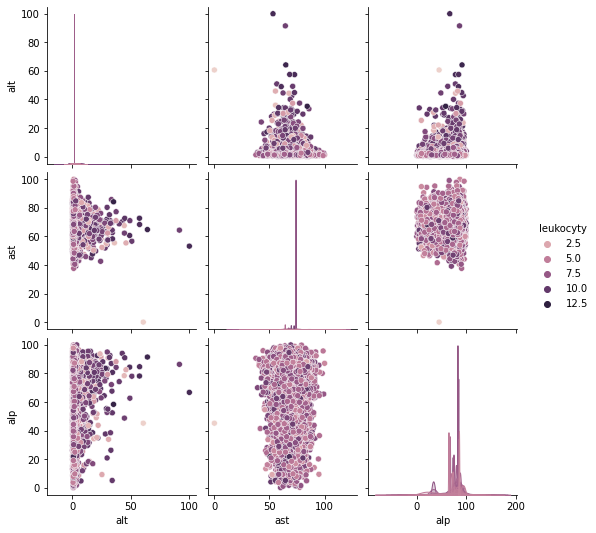

In [21]:
# erytrocyt + leukocyty

df_final = df_labor[['leukocyty', 'alt', 'ast', 'alp']]
sns.pairplot(df_final, hue='leukocyty')

<AxesSubplot:>

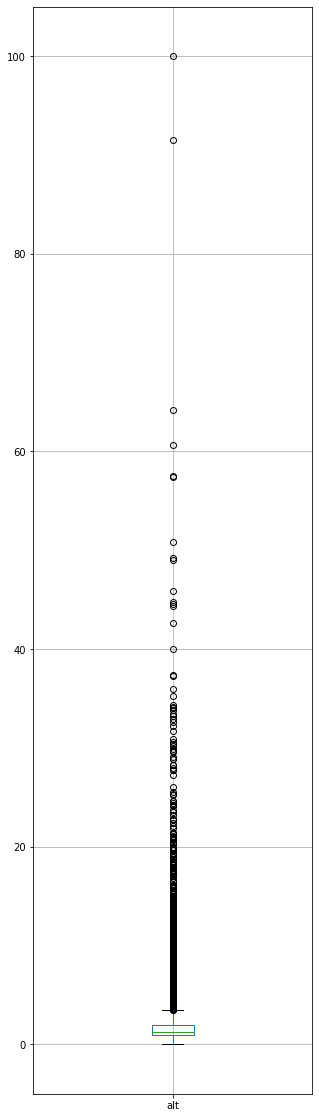

In [22]:
df_labor.boxplot("alt", figsize=(5,20))

#### Heatmap  
    
 - leukocyty + indicator majú pozitívnu koreláciu
 - etytr + indicator majú pozitívnu koreláciu

<AxesSubplot:>

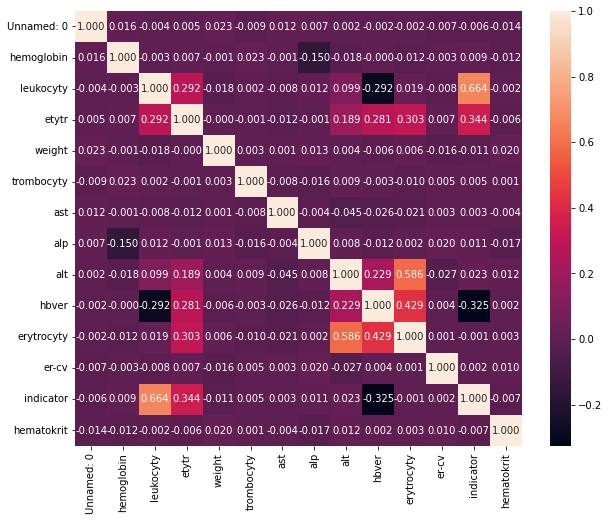

In [101]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_labor.corr(), ax=ax, annot=True, fmt=".3f")

#### pairplot

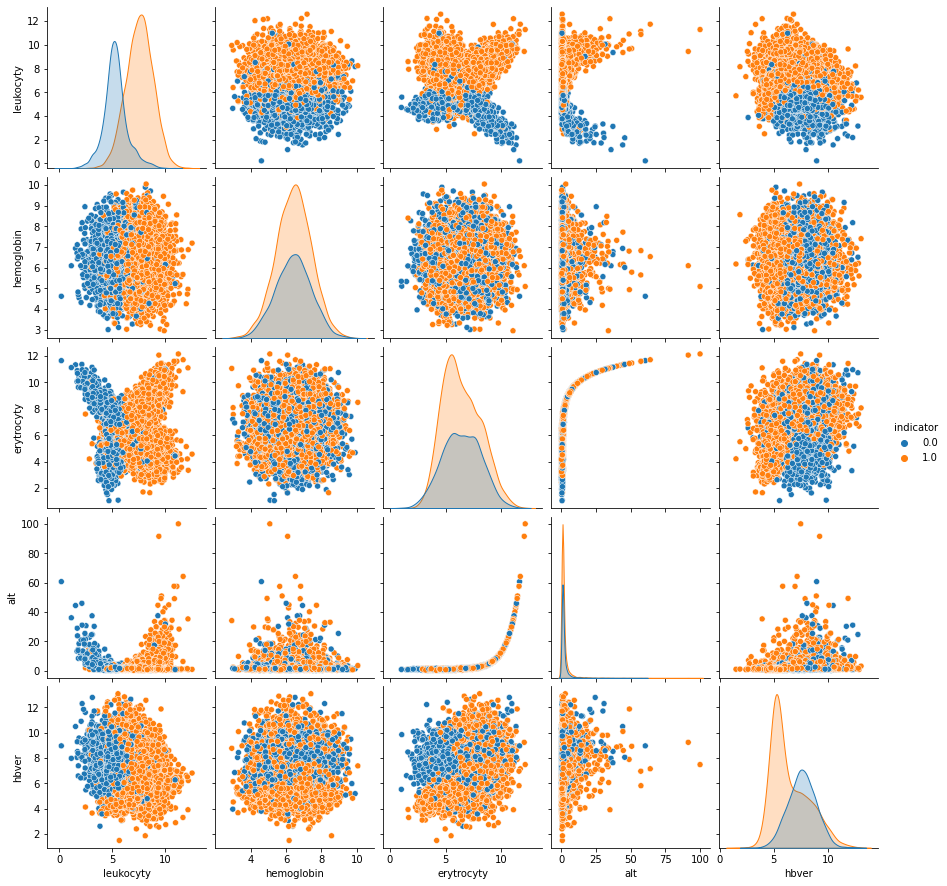

In [120]:
def corrfunc(x, y, **kws):
    (r, p) = stats.pearsonr(x, y)

df_vyber = df_labor[['leukocyty', 'hemoglobin', 'erytrocyty', 'alt', 'hbver', 'indicator']]
graph = sns.pairplot(df_vyber, hue="indicator")
#graph.map(corrfunc)

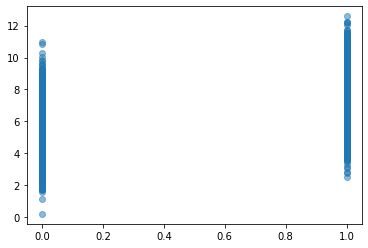

In [122]:
plt.scatter(df_labor.indicator, df_labor.leukocyty, alpha=0.5)
plt.show()

In [23]:
# leukocyt + hematokrit

In [24]:
# leukocyt + hemoglobin

In [25]:
# leukocyt vyššie => alt, alp a ast (enzýmy - hovoria o poškodení orgánov)

## 3. Formulácia a štatistické overenie hypotéz o dátach 

### Zadanie

 - Sformulujte dve hypotézy o dátach v kontexte zadanej predikčnej úlohy. Príkladom je napr. pacienti v zlepšenom stave majú v priemere inú (vyššiu/nižšiu) hodnotu nejakej látky alebo hormónu ako pacienti v nezlepšenom stave.
 - Sformulované hypotézy overte vhodne zvoleným štatistickým testom.
 
 ### Riešenie  
 
 #### Pred formuláciou štatistických hypotéz je potrebne určiť, či máme Gaussovú distribúciu
 
 - hemoglobin dáta majú Gaussovú distribúciu, možno použiť parametrické štatistické metódy
 - overili sme histogramom + distribution plot, Shapiro-Wilk test

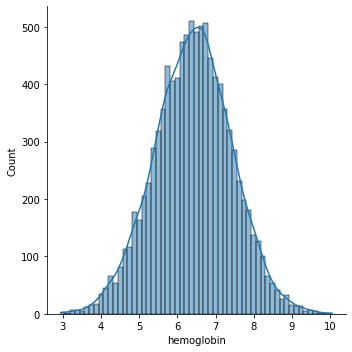

In [26]:
sns.displot(df_labor.hemoglobin, kde=True)

 - Shapiro-Wilk test overí nulovú hypotézu 𝐻0 - data hemoglobinov sú tzv. normal distribution. Odmietame H0 pri pvalue viac ako 5%, opačne môžeme hypotézu považovať za prijatú.

In [27]:
shapiro_test = stats.shapiro(df_labor.hemoglobin)
print(shapiro_test)

# interpretácia
alpha = 0.05 # p_value, ak mame viac ako 5%, tak odmietame data
if shapiro_test.pvalue > alpha:
    print('Normal distribution (H0 neodmietame)')
else:
    print('Other distributions (H0 odmietame)')

ShapiroResult(statistic=nan, pvalue=1.0)
Normal distribution (H0 neodmietame)


/home/erik/.local/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


 - vzhľadom na to, že máme viac ako 5000 vzoriek, tak prevedieme ešte Kolmogorovov-Smirnovov test normalnosti distribucie

In [125]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest
# one-sample Kolmogorovov-Smirnovov test
stats.kstest(df_labor.hemoglobin, df_labor.hemoglobin)
#stats.kstest(df_labor.hemoglobin, 'norm') #pvalue=nan

KstestResult(statistic=0.0, pvalue=1.0)

 - qqplot - normal, hodnoty ležia s priamkou, konštatujeme normal distribution

/home/erik/.local/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


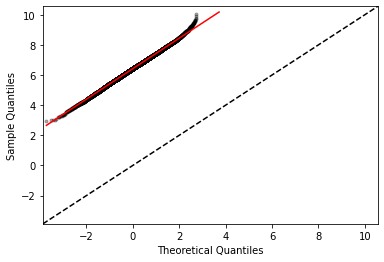

In [78]:
qq = sm.ProbPlot(df_labor.hemoglobin).qqplot(line='q', marker='.', markerfacecolor='k', markeredgecolor='k', alpha=0.3)
sm.qqline(qq.axes[0], line='45', fmt='k--')

/home/erik/.local/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


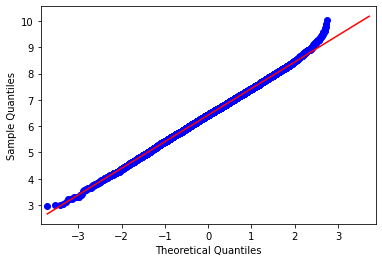

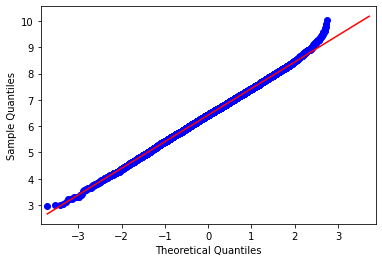

In [61]:
sm.qqplot(df_labor.hemoglobin, stats.distributions.norm, line='q')

In [85]:
df_labor.hemoglobin.min(), df_labor.hemoglobin.max()

(2.94415, 10.04984)

 #### Hypotéza 1: 
 
**Analysis of Variance (ANOVA)** - analýza rozptylu, overenie, či na veličinu má vplyv iná veličina, The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean

**Hypothesis**
- $H_0$ = the mean across two or more groups are equal 
- **Fail to Reject $H_0$**: All sample distributions are equal 
- **Reject $H_0$**: One or more sample distributions are not equal

URL https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

Statistics=0.008, p=0.999
Same distributions (fail to reject H0)


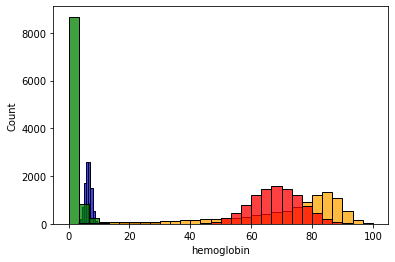

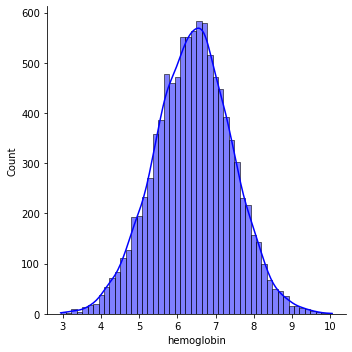

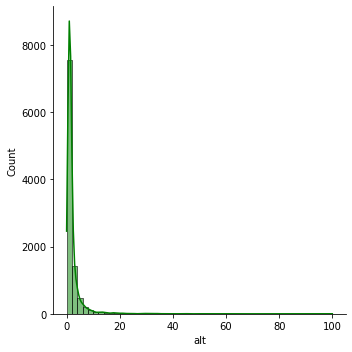

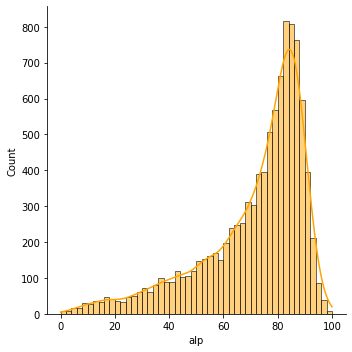

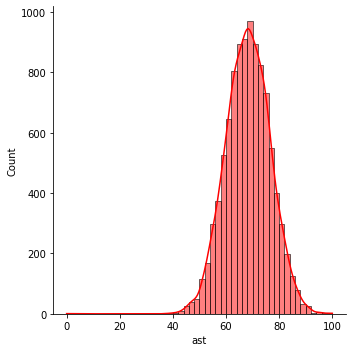

In [29]:
# ak je nizsi hemoglobin, tak je vyssia pravdepodobnost, tak alt, alp a ast budu asi vyssie
alpha = 0.05

sns.histplot(df_labor.hemoglobin, bins=10, color="blue")
sns.histplot(df_labor.alt, bins=30, color="green")
sns.histplot(df_labor.alp, bins=30, color="orange")
sns.histplot(df_labor.ast, bins=30, color="red")

sns.displot(df_labor.hemoglobin, bins=50, color="blue", kde=True)
sns.displot(df_labor.alt, bins=50, color="green", kde=True)
sns.displot(df_labor.alp, bins=50, color="orange", kde=True)
sns.displot(df_labor.ast, bins=50, color="red", kde=True)

# compare samples
stat, p = stats.f_oneway(~df_labor.hemoglobin.isna(), ~df_labor.alt.isna(), ~df_labor.alp.isna(), ~df_labor.ast.isna())
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

#### Hypozéza 2  

 - Hodnoty leukocytov sú menšie ako hodnoty erytrocytov

0.10393622321873447 7.49823322922944e-48
H0 odmietame, H1 neodmietame - hodnotovo leukocytov je viac


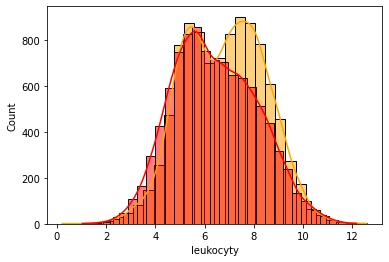

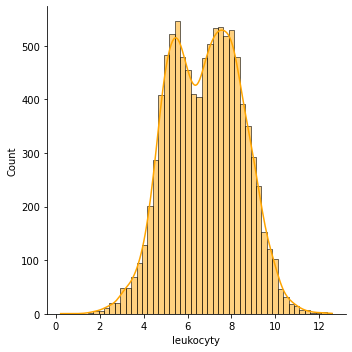

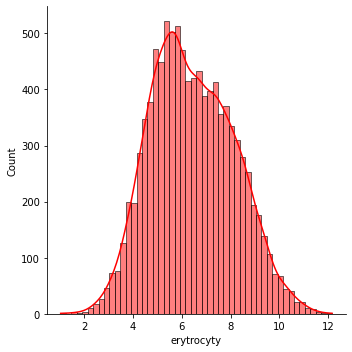

In [100]:
# two-sample Kolmogorovov-Smirnovov test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy.stats.ks_2samp
ks2 = stats.ks_2samp(df_labor.erytrocyty, df_labor.leukocyty, alternative='greater')
# greater: H0 is that F(x) <= G(x) for all x; the alternative is that F(x) > G(x) for at least one x

sns.histplot(df_labor.leukocyty, bins=30, color="orange", kde=True)
sns.histplot(df_labor.erytrocyty, bins=30, color="red", kde=True)

sns.displot(df_labor.leukocyty, bins=50, color="orange", kde=True)
sns.displot(df_labor.erytrocyty, bins=50, color="red", kde=True)

print(ks2.statistic, ks2.pvalue)

# interpretácia
alpha = 0.05 # p_value, ak mame viac ako 5%, tak odmietame data
if ks2.pvalue > alpha:
    print('H0 neodmietame - hodnotovo leukocytov je menej')
else:
    print('H0 odmietame, H1 neodmietame - hodnotovo leukocytov je viac')

#### Hypoteza 3 - pozrieme sa na leukocyty, hemoglobin a erytrocyty

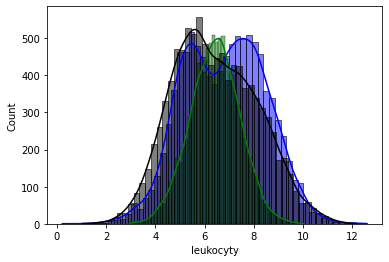

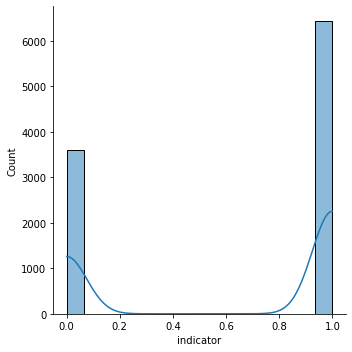

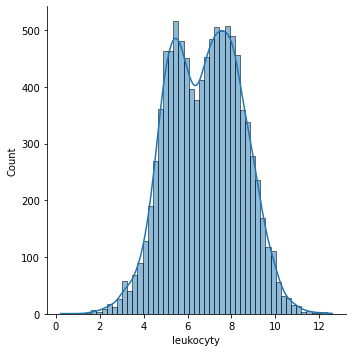

In [98]:
#sns.histplot(df_labor.indicator, color='red', kde=True)
sns.histplot(df_labor.leukocyty, color='blue', kde=True)
sns.histplot(df_labor.hemoglobin, color='green', kde=True)
sns.histplot(df_labor.erytrocyty, color='black', kde=True)

sns.displot(df_labor.indicator, kde=True)
sns.displot(df_labor.leukocyty, kde=True)

## 4. Identifikácia problémov v dátach s navrhnutým riešením  

### Zadanie

 - Identifikujte problémy v dátach napr.: nevhodná štruktúra dát, duplicitné záznamy, nejednotné formáty, chýbajúce hodnoty, vychýlené hodnoty. V dátach sa môžu nachádzať aj iné, tu nevymenované problémy.
 - Navrhnuté riešenie prvotne realizujte na dátach. Problém s dátami môžete riešiť iteratívne v každej fáze aj vo všetkých fázach podľa potreby.
 
 ### Riešenie
 
 

Dáta v týchto datasetoch nie sú správne pripravené na ďaľšiu analýzu. V dátach sa nachádza veľké množstvo problémov, nesprávych hodnôt a outlinerov. Tieto nezrovnalosti môžu výrazne narušiť výsledky analýzy a preto tieto nezrovnalosti musíme správne identifikovať a navrhnúť ich riešenia. 

 ## Najskôr sa pozrieme na tabuľku s profilom pacientov kde nájdeme osobné informácie o pacientoch.

 - Ako prvý problém môžeme vidieť stĺpec "Unnamed: 0", ktorý reprezentuje poradie riadkov. Tento stĺpec nieje nutné v dátach uchovávať nakoľko dáta sú indexované automaticky pomocou knižnice pandas. Takýto stĺpec môže spôsobovať veľké problémy pri predspracovávani datasetu. Každý vymazaný záznam naruší štruktúru takéhoto stĺpca a poradie záznamov už viac nebude platné. Preto tento stĺpec by bolo stále nutné upravoať a dávať pozor či je v správnom stave, čo je pre nás v tomto prípade zbytočné nakoľko všetky tieto operácie robí pandas automaticky s vstavaným indexovaním. Preto **tento stĺpec navrhujeme odstrániť.**

In [1]:
df_profiles.sex.value_counts()

NameError: name 'df_profiles' is not defined

 - Na prvý pohľad je zrejmé že hodnoty v stĺpci sex nadobúdaju iba dve hodnoty. Túto hypotézu sme overili pomocou príkazu value_counts, ktorý zrátal všetky výskyty hodnôt. Jednoducho teda vieme vyhlásiť že sa v tomto stĺpci nachádzajú iba hodnoty F a M. Tieto hodnoty reprezentujú pohlavie pacienta a preto v tomto stĺpci sa iná hodnota ani len vyskytnúť nemôže. Preto **tento stĺpec navrhujeme zmeniť na dátový typ bool a uchovávať 0 namiesto M (Male) a 1 namiesto F (Female).**

In [ ]:
df_profiles.birthdate.head()

 - Stĺpec birthdate je stĺpec, ktorý taktiež spôsobuje problém v konzistentnosti dát. Tento stĺpec vyjadruje dátum narodenia pacientov avšak je zapísaný v rôznych formách a némá teda žiadnu unifikovanú konzistentnú formu. Tento fakt môže výrazne sťažiť prácu s dátami. Niektoré dátumy taktiež obsahujú čas, ktorý však pri niektorých dátumoch zase naopak chýba. Kvôli faktu že čas z dát predikovať nedokážeme - **tento stĺpec navrhujeme zmeniť na dátumovú formu yyyy-mm-dd bez použitia času.**

In [ ]:
df_profiles.loc[:, df_profiles.columns != "Unnamed: 0"].duplicated(keep=False).value_counts()

- Ďalším problémom s ktorým sa potrebujeme vysporiadať sú duplicitné záznami. Duplicitné záznami sú v datasetoch redundantné a môžu pri veľkom výskyte skreslovať výsledky analýzy. Pri hľadaní doplikátov sme najprv pozreli či sa v tabuľke nanchádzajú doslovné duplikáty ktoré majú všetky stĺpce rovnaké (okrem stĺpca "Unnamed: 0" nakoľko predstavuje číslo riadku). Takéto duplikáty sa tam nenachádzajú a preto sme zvolili inú taktiku.

In [ ]:
df_profiles.duplicated(subset=["ssn"], keep=False).value_counts()

- Kedže dataset profiles nám hovorí o osobných informáciách pacientov tak niektoré zo stĺpcov musia byť unikátne aby sme vedeli identifikovať pacienta. Unikátny stĺpec pre nás je stĺpec ssn ktorý sa musí v datasete nachádzať práve raz. Každé ssn sa nachádza v datasete práve raz.

In [ ]:
df_profiles[df_profiles.duplicated(subset=["name", "race", "sex","blood_group","birthdate", "address"], keep=False)]

- Na základe atribútov meno, rasová príslušnosť, pohlavie, krvná skupina, dátum narodenia a adresa vieme overiť či aj napriek rozdielnemu ssn títo pacienti niesu zapísaný dvakrát. Je veľmi nízka pravdepodobnosť, že by všetky tieto atribúty dvaja pacienti spolu zdieľali. Preto môžeme vyhlásiť že v datasete profilov niesu žiadne duplicitné záznamy. 

- Najväčším problémom každého datasetu sú chybné/chýbajúce hodnoty. Tieto hodnoty sa vyhotoviteľovi dát nepodarilo získať/zapísal ich nesprávne. Chýbajúce hodnoty predstavujú pre dátovu analýzu veľký problém nakoľko vedia úplne skresliť výsledky dát. Tieto chýbajúce hodnoty však vieme rozdieliť na cve veľké skupiny.

    - **Skupina 1:** Stĺpce v ktorých obsah **nieje** veľmi dôležitý pre ďalšiu analýzu. 
        - Sú to väčšinou stringové stĺpce v ktorých nevieme predikovať/opraviť/doplniť hodnotu. Tieto stĺpce pre naše ďalšie analýzy nebudú s veľkou pravdepodobnosťou hrať veľkú rolu a preto sa im nebudeme venovať do veľkej hĺbky. Preto **v týchto stĺpcoch navrhujeme za prázdne hodnoty priradiť x alebo nan a chybné hodnoty ignorovať poprípade taktiež zmeniť na x.**
            - Všetky stĺpce 
            
    - **Skupina 2:** Stĺpce v ktorých obsah **je** dôležitý pre ďalšiu analýzu. 
        - V týchto stĺpcoch sú pre nás hodnoty dôležité pre vypočty dátovej analýzy. Preto sa treba s týmito hodnotami nejakým spôsobom vysporiadať. S chýbajúcimi hodnotami sa vieme vysporiadať napríklad pomocou doplnenia mediánu. S chybnými hodnotami je ideálne ich nahradenie alebo úplné ignorovanie. Preto **navrhujeme chýbajúce aj chybné hodnoty nahradiť mediánom poprípade ak sa medián nebude dať doplniť (Stringové stĺpce) tieto záznami ignorovať.**
            - Žiadny stĺpec

# Teraz sa pozrieme na tabuľku laboratórnych výsledkov.

 - Veľmi zreteľný problém je takisto aj v tomto datasete v stĺpci "Unnamed: 0". Tento stĺpec znovu reprezentuje poradie riadkov a znovu je pre nás redundantný. Dôvod jeho redundancie je vysvetlený vyššie pri indentifikácii problémov datasetu profilov pacientov. **Tento stĺpec navrhujeme odstrániť.**
 

In [ ]:
df_labor.smoker.value_counts()

- Stĺpec smoker je na prvý pohľad taktiež problémový. Po jednoduchom sčítaní hodnôt vidíme že v tomto stĺpci sa nachádza zbytočne veľké množstvo označení reprezentujúcich čí pacient je fajčiar alebo nieje. Tento systém zapisovania sa dá zjednodušiť iba na dve hondoty nakoľko pacient môže byť iba fajčiar alebo nefajčiar - nič medzi. Preto **tento stĺpec navrhujeme zmeniť na dátový typ bool a uchovávať 0 namiesto N/no a 1 namiesto Y/yes.**

In [ ]:
df_labor.indicator.value_counts()

- Stĺpec indicator sa na prvý pohľad tiež javí ako problémovy a preto sme nechali vypísať všetky typy hodnôt pomocou value_counts. Zistili sme že v stĺpci sa správne nachádzajú iba hodnoty 1 a 0. Avšak stĺpec indicator indikuje či pacientovi má byť poskytnutá ďaľšia liečba a preto sa v ňom môžu vykytovať iba hodnoty 1/0 alebo inak povedané True/False. Tento stĺpec je však nastavený na int64 aj napriek tomu, že iné hodnoty ako 1 a 0 nikdy nedosiahne. Preto ***tento stĺpec navrhujeme zmeniť na dátový typ bool a uchovávať jednotky a nuly vo formáte bool namiesto float.** 

In [ ]:
df_labor.loc[:, df_labor.columns != "Unnamed: 0"].duplicated(keep=False).value_counts()

 - Tak ako v datasete profilov musíme aj v tomto datasete skontrolovať výskyt duplicitných hodnôt z dôvodu skreslenia výsledkov analýzy. V tejto tabuľke môžeme hneď vidieť 198 duplicítnych záznamov ktoré majú úplne všetky atribúty totožné. 

In [ ]:
mask = df_labor[df_labor.loc[:, df_labor.columns != "Unnamed: 0"].duplicated(keep=False)].groupby("name").size() != 2
filtered = df_labor[df_labor.loc[:, df_labor.columns != "Unnamed: 0"].duplicated(keep=False)].groupby("name").size() 
filtered[mask]

 - Predpokladali sme že v datasete sú niektoré riadky uložené dvojmo avšak preisotu sme si to overili a zistili sme že máme jedného pacienta uloženého štvormo a ostatných 194 výsledkov je 92 pacientov uložených dvojmo. **Tieto riadky navrhujeme vyfiltrovať a ponechať z každého iba prvú hodnotu.**

- Ďalším problémom ktorý sa nachádza v našich datasetoch sú chybné hodnoty. 
 
    - **Skupina 1:** Stĺpce v ktorých obsah **nieje** veľmi dôležitý pre ďalšiu analýzu. 
    
    - **Skupina 2:** Stĺpce v ktorých obsah **je** dôležitý pre ďalšiu analýzu. 